<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_attack_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df = pd.read_csv('../dataset/gk_new.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,G. Donnarumma,23,2026,88,92,103500000.0,110000.0,12,12,12,36,8,28,12,14,34,30,50,55,64,85,38,59,72,34,72,18,30,26,14,60,24,65,20,14,16,90.0,82.0,79.0,85.0,89.0
1,T. Courtois,30,2026,90,90,79500000.0,250000.0,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,85.0,89.0,75.0,90.0,90.0
2,Alisson,29,2027,89,90,79000000.0,190000.0,17,13,29,60,20,27,19,18,58,40,58,49,40,87,37,64,52,32,78,14,27,11,13,66,23,66,15,19,16,86.0,85.0,85.0,90.0,89.0


In [37]:
df = df[['Value', 'Agility', 'Reactions', 'Composure', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']]

In [38]:
# số cell bị null
df.isnull().sum()

Value               0
Agility             0
Reactions           0
Composure           0
GK Diving         118
GK Handling       118
GK Kicking        118
GK Positioning    118
GK Reflexes       118
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
# số hàng bị lặp
df.duplicated().sum()

0

In [41]:
# chuẩn hóa dữ liệu
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  # đưa chỉ số về khoảng 0->1
  df[column] = df[column]/100

  # nên cho xuống dưới sau khi thể hiện correlation thì *2 các cột có correlation cao
  # ==== đối với tiền tạo thì chỉ số dứt điểm quan trọng hơn nên *2 để mô hình dự đoán nhạy cảm hơn với chỉ số nàys ===============
  #if column == 'Finishing': df[column] = df[column]*2

# đưa giá trị cầu thủ về thang đơn vị log
df['Value'] = np.log(df['Value'])

In [42]:
df.describe()

,Value,Agility,Reactions,Composure,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,15.282162,0.454945,0.711538,0.523571,0.756154,0.732308,0.716319,0.744505,0.774505
std,1.411004,0.110487,0.079103,0.123104,0.060235,0.062993,0.072426,0.066237,0.063477
min,12.765688,0.210000,0.460000,0.240000,0.590000,0.580000,0.480000,0.550000,0.600000
25%,14.285514,0.370000,0.660000,0.432500,0.720000,0.700000,0.670000,0.700000,0.730000
50%,15.201805,0.440000,0.720000,0.560000,0.760000,0.740000,0.720000,0.750000,0.770000
75%,16.454568,0.530000,0.760000,0.630000,0.800000,0.770000,0.760000,0.790000,0.827500
max,18.455082,0.690000,0.870000,0.700000,0.900000,0.900000,0.910000,0.900000,0.900000


###Utility function

In [43]:
# thể hiện quan hệ giữa giá trị chuyển nhượng với các thuộc tính khác
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [44]:
# vẽ biểu đồ hộp
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [45]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    # gán giá trị bất thường = lower fence hoặc higher fence
    for i in IndexL_Outlier:
      data[column][i] = Lower_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = Higher_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

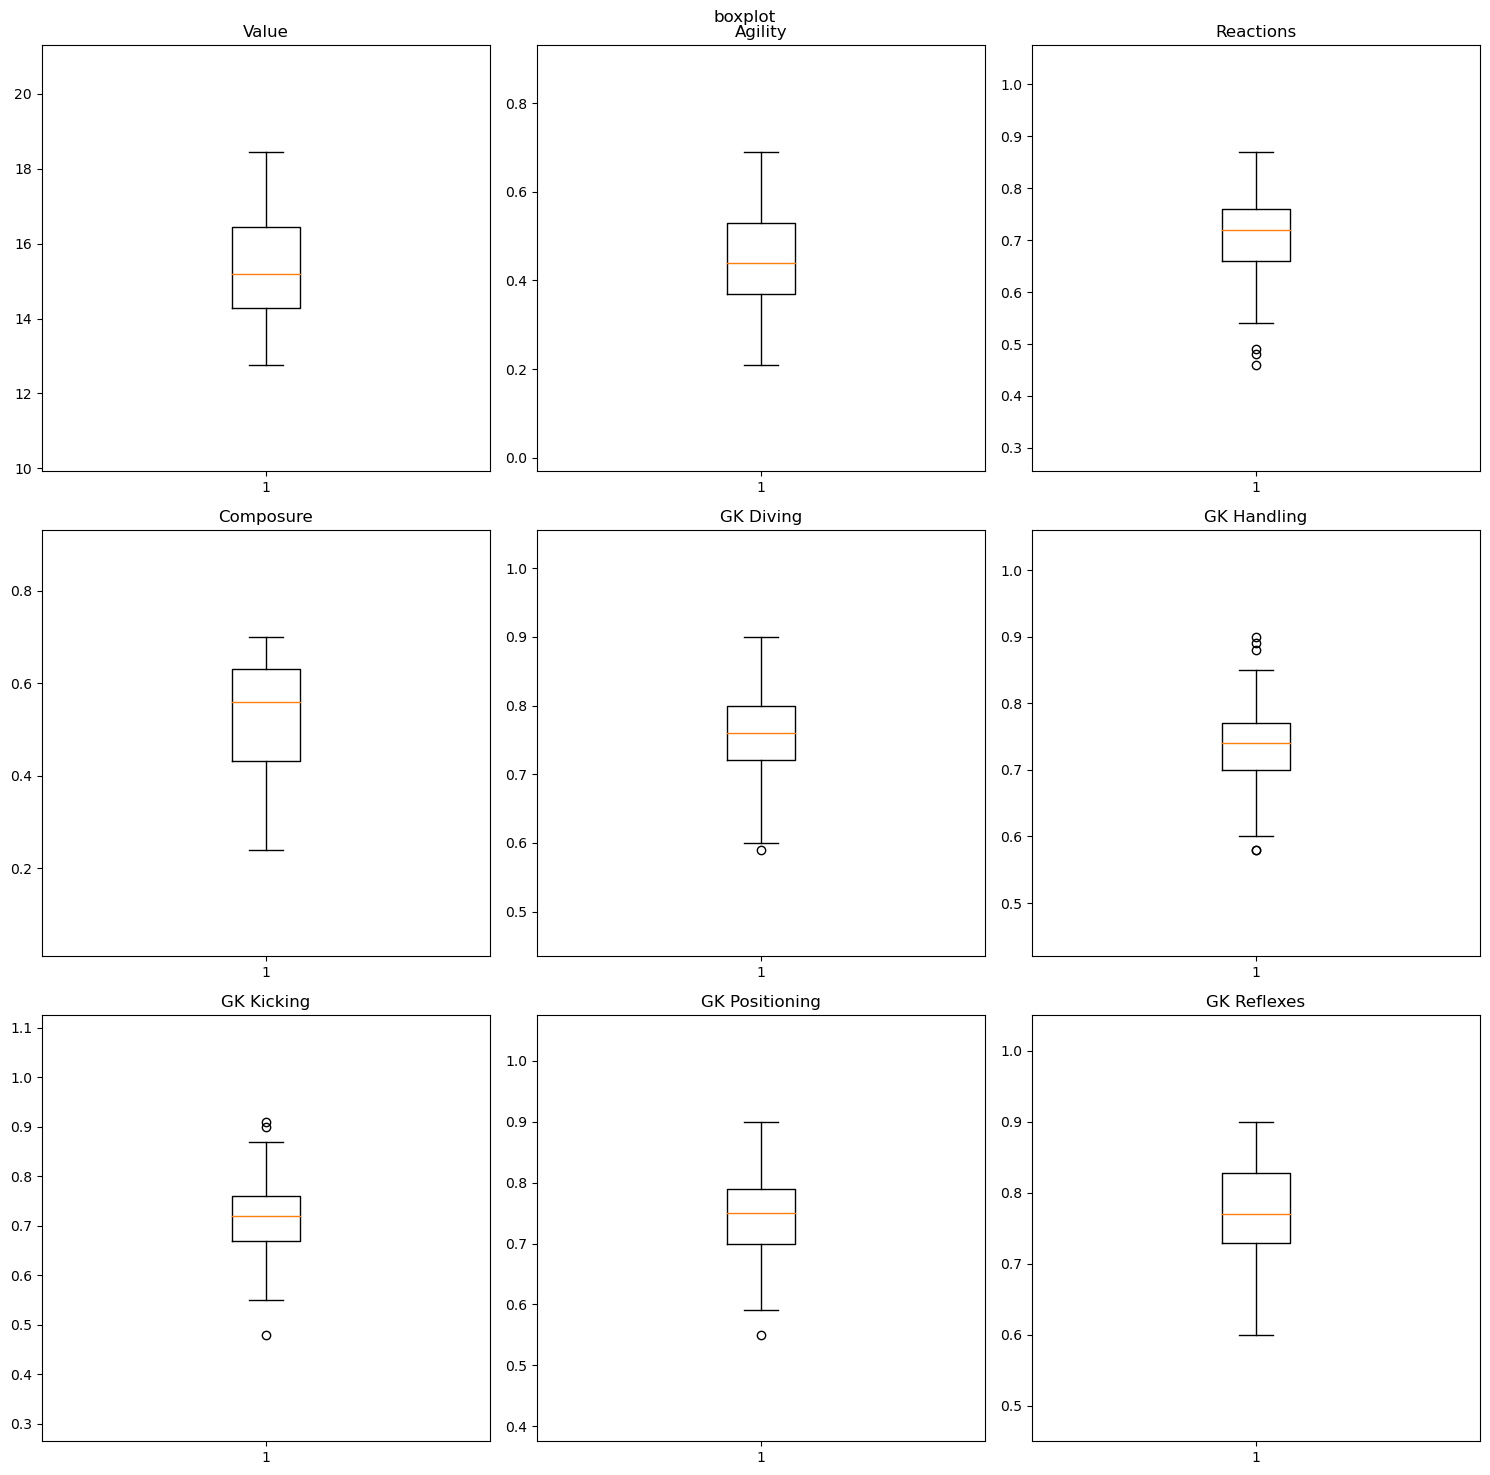

In [46]:
plot_boxplot(numeric_columns, "boxplot", 3)

In [47]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 11.031933636655726
Higher fence is = 19.708148438133815
Applied to 0 row(s) of Value column
Lower fence is = 0.12999999999999995
Higher fence is = 0.77
Applied to 0 row(s) of Agility column
Lower fence is = 0.51
Higher fence is = 0.9099999999999999
Applied to 3 row(s) of Reactions column
Lower fence is = 0.13624999999999998
Higher fence is = 0.92625
Applied to 0 row(s) of Composure column
Lower fence is = 0.5999999999999999
Higher fence is = 0.9200000000000002
Applied to 1 row(s) of GK Diving column
Lower fence is = 0.5949999999999999
Higher fence is = 0.8750000000000001
Applied to 5 row(s) of GK Handling column
Lower fence is = 0.5350000000000001
Higher fence is = 0.895
Applied to 3 row(s) of GK Kicking column
Lower fence is = 0.5649999999999998
Higher fence is = 0.9250000000000002
Applied to 1 row(s) of GK Positioning column
Lower fence is = 0.5837500000000001
Higher fence is = 0.9737499999999998
Applied to 0 row(s) of GK Reflexes column


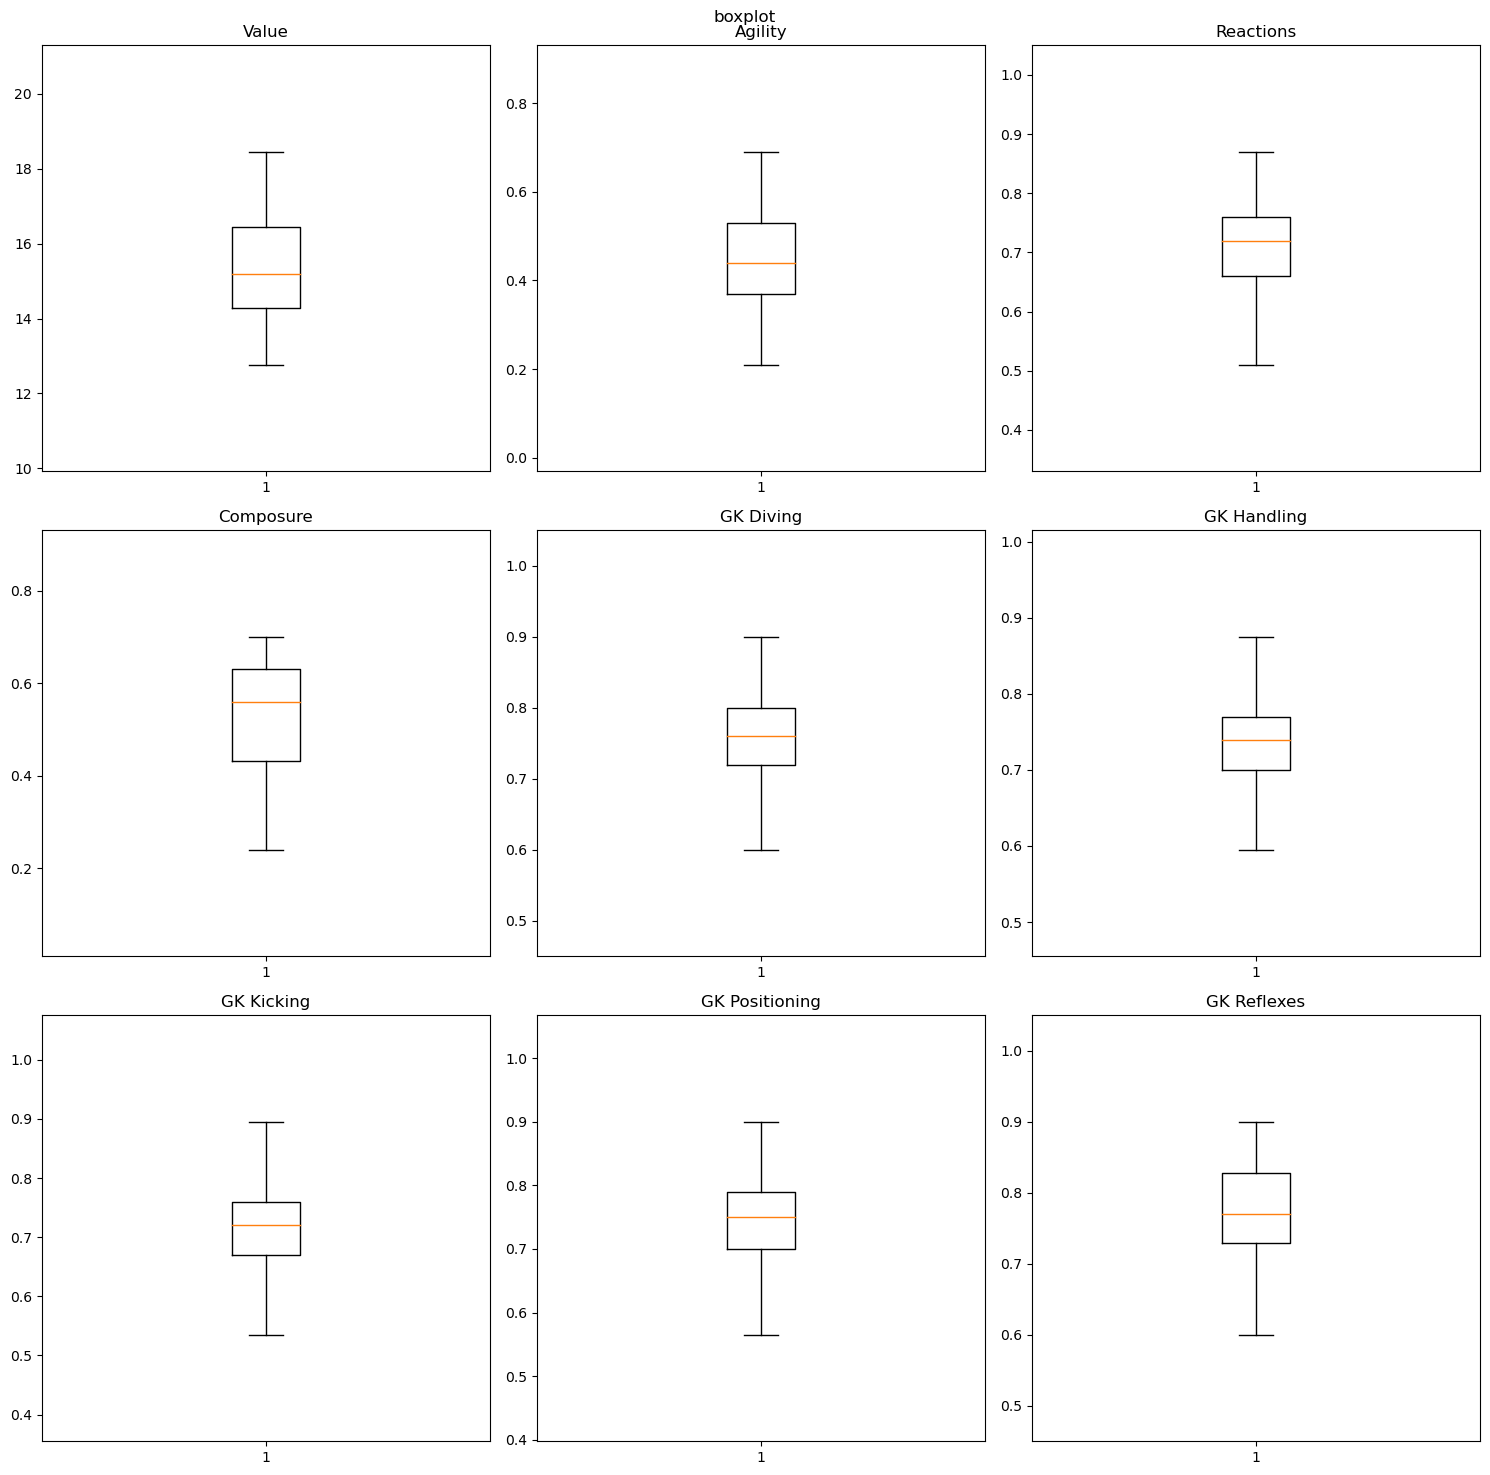

In [48]:
plot_boxplot(numeric_columns, "boxplot", 3)

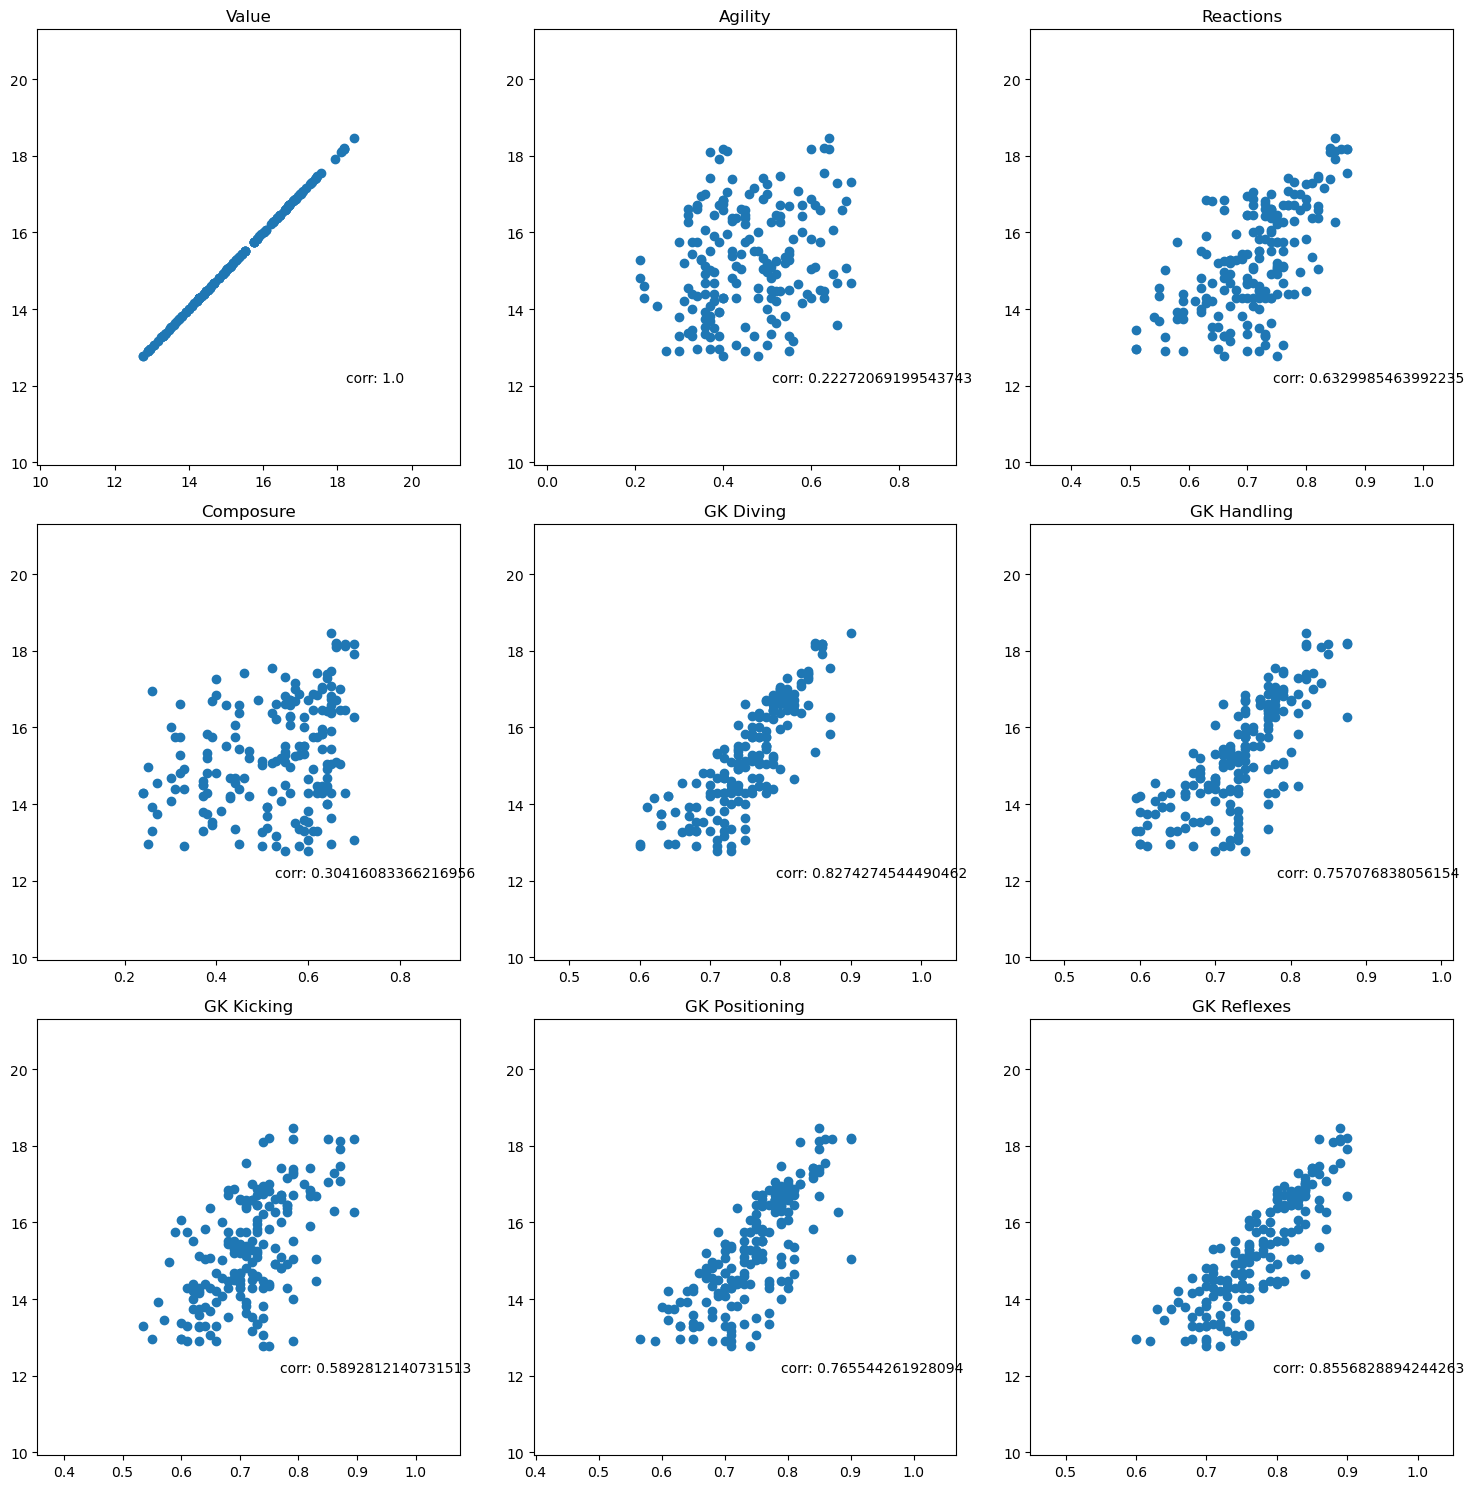

In [49]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=3)

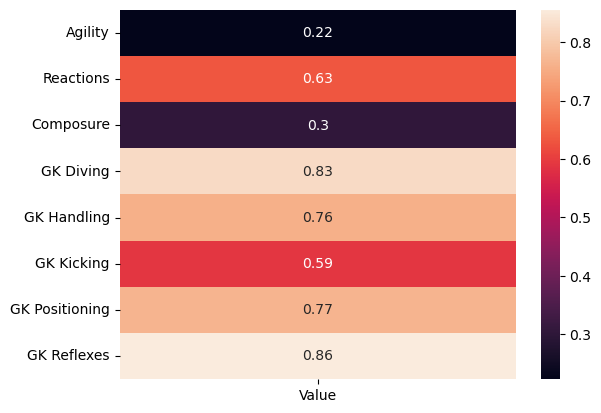

In [50]:
# tính corelation
# 1 là phụ thuộc tuyến tính dương
# 0 là ko phụ thuộc tt
# -1 là phụ thuộc tt âm
correlations = df.corr().drop('Value', axis=0)['Value']
correlations = pd.DataFrame(correlations)
sns.heatmap( correlations, annot=True, yticklabels=True)
plt.show()

In [51]:
# # Tính Q3 của tất cả các tương quan với 'value'
# q3_corr_value = correlations['Value'].quantile(0.75)

# attrWithHighCorr = []
# for index, value in correlations['Value'].items():
#     if value > q3_corr_value:
#         attrWithHighCorr.append(index)

# # Hiển thị các thuộc tính được chọn
# print("Attributes with high correlation value:", attrWithHighCorr)

In [52]:
# # các thuộc tính có correlation với Value cao sẽ được bình phương để dự đoán nhạy hơn với các thuộc tính này
# for attr in attrWithHighCorr:
#     df[attr] = (df[attr]**2) * 100
# df

In [53]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

# tỉ lệ 20% là dữ liệu để test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(min_samples_split=math.ceil(len(y_train)/200)),
    'random_forest': RandomForestRegressor(100, min_samples_split=math.ceil(len(y_train)/200))
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
    # chia tập train thành 5 tập nhỏ và tạo ra 5 model được train trên từng tập nhỏ
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  # test 5 model trên tập test
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  # lấy trung bình
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  # gần 1 là tốt
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.622472636120882
RMSE:  0.7802516732204413
r2 score:  0.6315445561574167

decision_tree
MAE:  0.6413778931165747
RMSE:  0.8420299404336646
r2 score:  0.5708880307329944

random_forest
MAE:  0.5164327725817175
RMSE:  0.7271266983117596
r2 score:  0.6800104891642141



In [55]:
from sklearn.model_selection import GridSearchCV

# thử hằng số phạt
param_grid = {
    'ridge_regression': {'alpha': np.arange(0.1, 0.2, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  # tìm alpha cho mô hình tốt nhất bằng cách thử các alpha với phương pháp cross-validate
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  # chọn alpha tốt nhất
  reg_linear_models[model_name] = grid_search.best_estimator_
  # huấn luyện lại trên toàn bộ tập train để tìm ra tham số của hàm tuyến tính
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.1)
MAE:  0.5959250175837683
RMSE:  0.7364025413668424
r2 score:  0.6717943013999068

Lasso(alpha=0.0009000000000000001)
MAE:  0.6174488714634795
RMSE:  0.7635971711183224
r2 score:  0.6471060752851745



In [56]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,17.014184,16.610306
1,16.588099,16.292341
2,13.681979,13.529131
3,15.039286,16.049541
4,13.910821,13.703180
5,17.265498,17.200822
6,16.860033,16.472008
7,15.761421,15.846399
8,14.603968,14.758611
9,15.068274,14.708209


Text(0.5, 1.0, 'Áp dụng mô hình rừng ngẫu nhiên cho thủ môn')

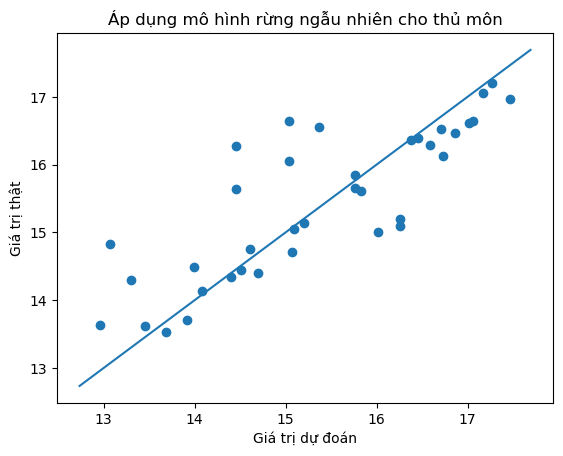

In [57]:
# các điểm nằm dưới đường chéo cho thấy y_test > y_pred và ngược lại
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật')
plt.title('Áp dụng mô hình rừng ngẫu nhiên cho thủ môn')

In [58]:
percent_loss = np.sum(abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 1./len(y_test)
percent_loss

0.8073872361719923

Text(0.5, 1.0, 'So sánh giá trị dự đoán và giá trị thật của thủ môn theo hàm mũ')

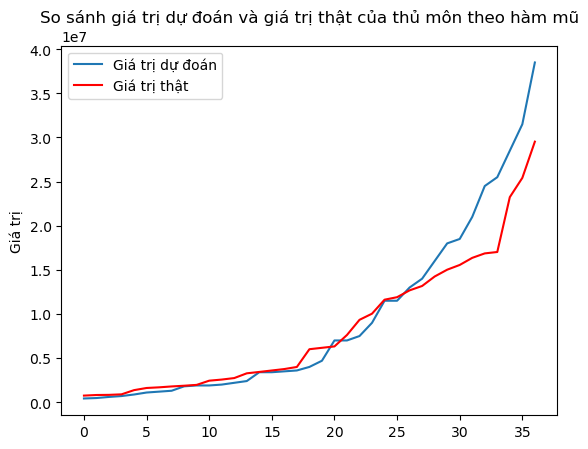

In [59]:
y_test = list(y_test)
y_test.sort()
y_pred.sort()
plt.plot(range(len(y_test)), np.exp(y_test), label='Giá trị dự đoán')
plt.plot(range(len(y_test)), np.exp(y_pred), color='#ff0000', label='Giá trị thật')
plt.legend()
plt.ylabel('Giá trị')
plt.title('So sánh giá trị dự đoán và giá trị thật của thủ môn theo hàm mũ')